In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap.umap_ as umap
import xarray as xr
import pandas as pd
import anndata
import json

samples = np.load(r"D:\Macaque\samples141Regions.npy")

In [14]:
non_nan_or_nonzero_row_indices = np.where(
    np.all(~np.isnan(samples), axis=1)
)[0]
print("Indices of rows with all positions that are not NaN:", non_nan_or_nonzero_row_indices)
print('Total number samples with all positions non NaN:')
print(len(non_nan_or_nonzero_row_indices))
print('Total samples')
print(len(samples))

print()
print('Macaque % of samples that have no NaNs:')
print(len(non_nan_or_nonzero_row_indices)/len(samples))



Indices of rows with all positions that are not NaN: [      0       1       2 ... 4108842 4108845 4108865]
Total number samples with all positions non NaN:
2682206
Total samples
4108908

Macaque % of samples that have no NaNs:
0.6527783050873858


In [15]:
# Flatten your samples into a 1D array.
all_feature_values = samples.flatten()

# Count the number of NaN values.
nan_count = np.isnan(all_feature_values).sum()

# Total number of elements.
total_count = all_feature_values.size

# Calculate the percentage.
percent_nans = (nan_count / total_count) * 100

print(f"Macaque Percentage of NaNs: {percent_nans:.2f}%")

Macaque Percentage of NaNs: 12.07%


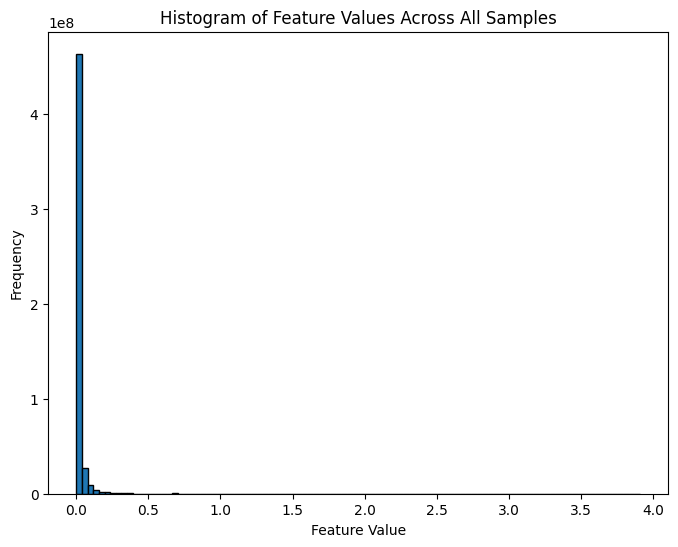

In [ ]:

# Collect all feature values into one 1D array
all_feature_values = samples.flatten()

# all_feature_values = all_feature_values*3

# Define the number of bins for the histogram
num_bins = 100

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(all_feature_values, bins=num_bins, edgecolor='black')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature Values Across All Samples')
plt.show()

In [45]:
print('Percentage of Number of Non-NaN values:')
print(100*(len(all_feature_values)-np.isnan(all_feature_values).sum())/len(all_feature_values))

Percentage of Number of Non-NaN values:
87.93087123967923


# Check genes that are in all cell types (Like Mouse Data)

In [1]:
import numpy as np

# # Load aggregated data
data = np.load(r"D:\Macaque\new_aggregated_data.npz")
mean_array = data['mean']  # shape: (15926, 141, 258)
genes = data['genes']      # array of gene names

# # make all original zeros 10.0
# mean_array[mean_array == 0.0] = 0.0

# Sum over the second dimension (regions) for each gene and cell type.
# nansum makes nan zero
sum_across_regions = np.nansum(mean_array, axis=1)  # shape: (15926, 258)

# Create a boolean mask: True if a gene has a non-NaN sum for every cell type.
valid_genes_mask = np.all(sum_across_regions !=0.0, axis=1)

# Extract the gene names that pass the test.
genes_with_all_values = genes[valid_genes_mask]

print("Number of genes with a value in every cell type:", len(genes_with_all_values))


Number of genes with a value in every cell type: 7


In [4]:
num_genes, num_cell_types, num_regions = mean_array.shape

# Dictionary to store results: key is cell type index, value is list of gene indexes.
celltype_to_gene_indexes = {}

# Loop over each cell type (axis=1)
for ct in range(num_cell_types):
    # For each gene (axis=0), count how many regions (axis=1) have a non-zero, non-NaN value.
    valid_counts = np.sum(~np.isnan(mean_array[:, ct, :]) & (mean_array[:, ct, :] != 0), axis=1)
    
    # Find gene indexes where the count exceeds 10.
    gene_indexes = np.where(valid_counts > 10)[0]
    
    # Only include cell types that have at least one gene meeting the criteria.
    if gene_indexes.size > 0:
        celltype_to_gene_indexes[ct] = gene_indexes.tolist()


value_size = []
for key, value in celltype_to_gene_indexes.items():
    value_size.append(len(value))
print('Each cell type with more than 10 regions that are not NaN:')
print(list(celltype_to_gene_indexes.keys()))
print('Number of samples per cell type:')
print(value_size)
print('Number of cells:')
print(len(celltype_to_gene_indexes.keys()))
print('Total number of samples:')
print(sum(value_size))
print('Each gene index for 18:')
print(celltype_to_gene_indexes[18])
print('Example for one sample:')
print(mean_array[2628,:,18])


Each cell type with more than 10 regions that are not NaN:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
Number of samples per cell type:
[13863, 14942, 14679, 13156, 14927, 14331, 13846, 14372, 14466, 13593, 14205, 14459, 15124, 13790, 15122, 12567, 14067, 12661, 15156, 14436, 14704, 14063, 15504, 13259, 14797, 14974, 14496, 15037, 15101, 14810, 14613, 15334, 14085, 15350, 14522, 12804, 14590, 14876, 13319, 14493, 13520, 14632, 15484, 12395, 152

171
228
250


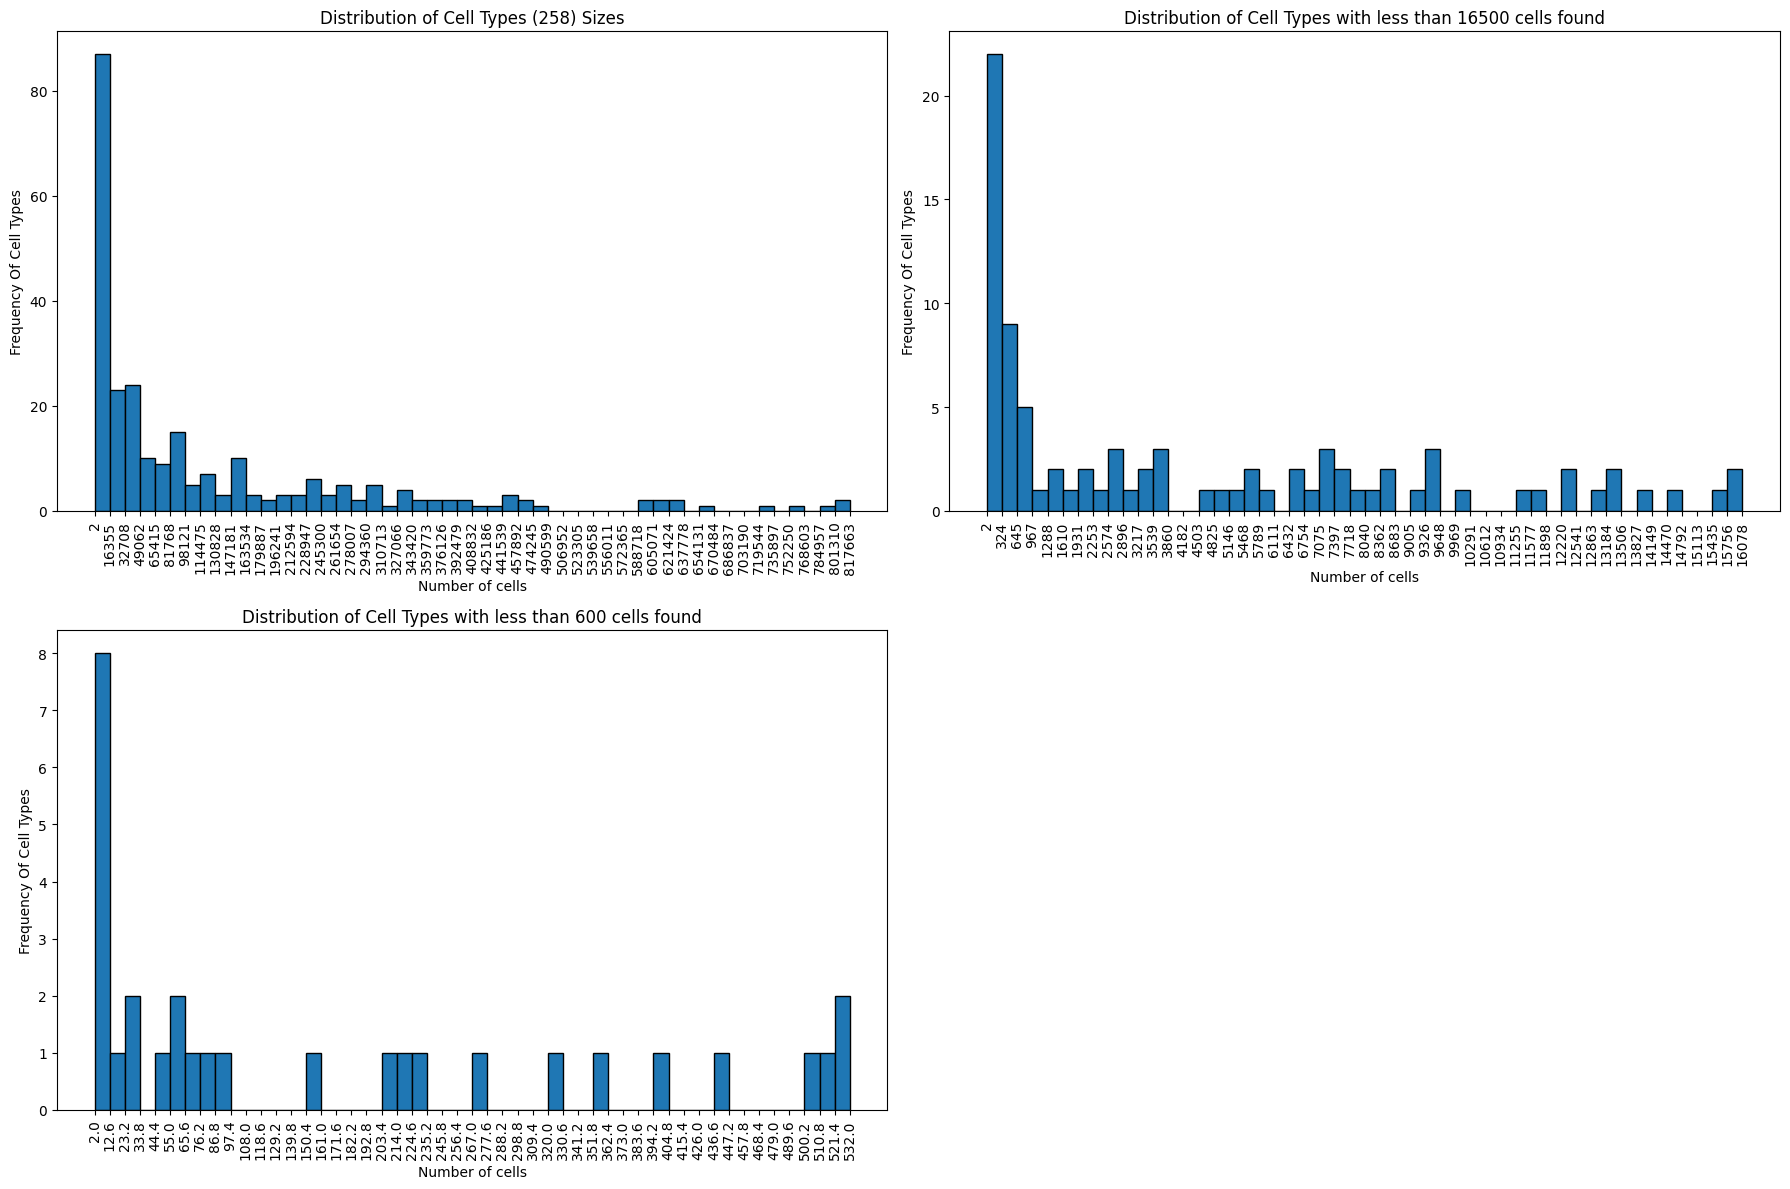

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the existing lookup CSV file
df = pd.read_csv(r"D:\Macaque\cell_id_to_celltype_lookup_with_index.csv")

# Group by 'celltype_index' and count the number of rows (cells) per group.
celltype_counts = df.groupby('celltype_index').size().reset_index(name='num_cells')

sizes = celltype_counts['num_cells'].to_list()


print(len([x for x in sizes if x>16500]))
print(len([x for x in sizes if x>600]))
print(len([x for x in sizes if x>12]))

# Create a histogram of the sizes
plt.figure(figsize=(18, 12))
plt.subplot(2,2,1)
n, bins, patches = plt.hist(sizes, bins=50, edgecolor='black')
plt.xticks(bins, rotation=90)  # rotate labels if necessary
plt.xlabel('Number of cells')
plt.ylabel('Frequency Of Cell Types')
plt.title('Distribution of Cell Types (258) Sizes')

sizes = [x for x in sizes if x < 16500]
plt.subplot(2,2,2)
# Create a histogram of the sizes
n, bins, patches = plt.hist(sizes, bins=50, edgecolor='black')
plt.xticks(bins, rotation=90)  # rotate labels if necessary
plt.xlabel('Number of cells')
plt.ylabel('Frequency Of Cell Types')
plt.title('Distribution of Cell Types with less than 16500 cells found')

sizes = [x for x in sizes if x < 600]
plt.subplot(2,2,3)
# Create a histogram of the sizes
n, bins, patches = plt.hist(sizes, bins=50, edgecolor='black')
plt.xticks(bins, rotation=90)  # rotate labels if necessary
plt.xlabel('Number of cells')
plt.ylabel('Frequency Of Cell Types')
plt.title('Distribution of Cell Types with less than 600 cells found')

plt.tight_layout()
plt.show()


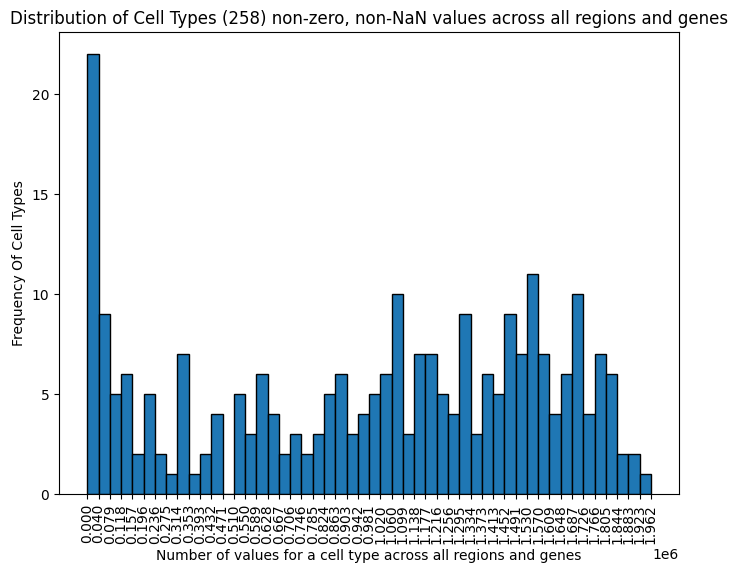

In [5]:
import matplotlib.pyplot as plt
# Create a boolean mask that is True where values are neither NaN nor zero.
valid_mask = (~np.isnan(mean_array)) & (mean_array != 0)

# Sum over genes (axis 0) and regions (axis 1) for each cell type (axis 2).
counts_per_celltype = np.sum(valid_mask, axis=(0, 1))  # shape: (258,)

# Create a lookup dictionary mapping cell type index to its count.
celltype_lookup = {celltype: int(count) for celltype, count in enumerate(counts_per_celltype)}

plt.figure(figsize=(8, 6))
# Capture the output of the histogram (n = counts, bins = bin edges)
n, bins, patches = plt.hist(counts_per_celltype, bins=50, edgecolor='black')
# Set ticks at the bin boundaries.
plt.xticks(bins, rotation=90)  # rotate labels if necessary
plt.xlabel('Number of values for a cell type across all regions and genes')
plt.ylabel('Frequency Of Cell Types')
plt.title('Distribution of Cell Types (258) non-zero, non-NaN values across all regions and genes')
plt.show()

# Finding all the macaque genes used in the macaque data that are 121 orthologs with 

In [ ]:
import numpy as np
import pandas as pd
# Collect Macaque Genes
data = np.load(r"D:\Macaque\new_aggregated_data.npz")
genes = data['genes']
df_gene = pd.DataFrame(genes, columns=['gene_name'])
df_gene.to_csv('D:\Macaque\macaque_genes.csv',index=False)

# Collect 121 orthologs
df_orthologs = pd.read_csv(r"D:\Macaque\Orthologs\AssigningMacaqueGeneIDs\Crab2MouseAllGenes.txt")
df_orthologs = df.dropna()
df_orthologs = df[df['Crab-eating macaque orthology confidence']==1]
df_orthologs = df[df['Crab-eating macaque homology type']=='ortholog_one2one']
df_orthologs.to_csv('D:\Macaque\Orthologs\AssigningMacaqueGeneIDs\Crab2Mouse121Orthologs.csv',index=False)

# Find overlaps
merged_df = df_orthologs.merge(df_gene[['gene_name']],
                      how='left',
                      left_on='Crab-eating macaque gene name',
                      right_on='gene_name')
# Remove any rows not found
merged_df = merged_df.dropna()
merged_df = merged_df.drop(columns=['gene_name'])
merged_df.to_csv('D:\Macaque\Orthologs\AssigningMacaqueGeneIDs\Genes121UsedInSpatialCells.csv',index=False)
print(merged_df.shape)

# Find overlap with the mouse genes used
df_mouse_gene = pd.read_csv(r"D:\Mouse\Notebooks\mouseGene.csv", usecols=['gene_identifier'])
mouse_macaque_merged_df = merged_df.merge(df_mouse_gene[['gene_identifier']],
                      how='left',
                      left_on='Gene stable ID',
                      right_on='gene_identifier')
mouse_macaque_merged_df = mouse_macaque_merged_df.dropna()
mouse_macaque_merged_df = mouse_macaque_merged_df.drop(columns=['gene_identifier'])
mouse_macaque_merged_df.to_csv('D:\Macaque\FINALMouseMacaque121Orthologs.csv',index=False)
print(mouse_macaque_merged_df.shape)

(10871, 6)
(4851, 6)


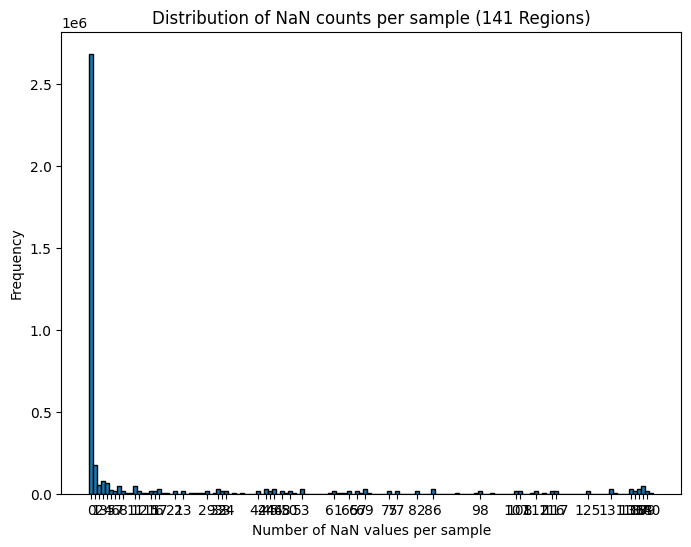

In [5]:
# Count the number of 0.0 values per sample for samples
nan_counts_samples = np.sum(np.isnan(samples), axis=1)
# Create bins so that each integer count is centered nicely:
bins_samples = np.arange(nan_counts_samples.min(), nan_counts_samples.max() + 2) - 0.5


# Create subplots
plt.figure(figsize=(8, 6))

# Left subplot for samples
counts_samples, bins_samples, patches_samples = plt.hist(nan_counts_samples, bins=bins_samples, edgecolor='black')
plt.xlabel('Number of NaN values per sample')
plt.ylabel('Frequency')
plt.title('Distribution of NaN counts per sample (141 Regions)')

# Calculate bin centers and select tick positions for samples
bin_centers_samples = (bins_samples[:-1] + bins_samples[1:]) / 2
nonzero_tick_values_samples = bin_centers_samples[counts_samples > 10000]
plt.xticks(nonzero_tick_values_samples)

plt.show()


In [ ]:
# Half the data has no NaNs
print(np.sum(nan_counts_samples < int(1)))

2682206


#### UMAP but data is too big:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

# Suppose your data is stored in a variable called "samples" with shape (n_samples, 239)
# For demonstration, let's create some dummy data:
# samples = np.random.randn(900000, 239)  # Replace with your actual data

# ----- PCA -----
# Run PCA on all 239 dimensions
pca_full = PCA(n_components=239)
pca_full.fit(samples)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components needed to capture at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of PCA components capturing 95% variance:", n_components_95)

# Now, transform your data using PCA with the number of components capturing 95% variance
pca_reducer = PCA(n_components=n_components_95)
reduced_data = pca_reducer.fit_transform(samples)
print("Reduced data shape:", reduced_data.shape)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ----- UMAP -----
# Now perform UMAP on the PCA-reduced data
umap_embedder = umap.UMAP(n_components=2, random_state=42)
embedding = umap_embedder.fit_transform(reduced_data)
print("UMAP embedding shape:", embedding.shape)

# Plot the UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
plt.title("UMAP Embedding on PCA-Reduced Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

# PCA Setting all NaNs to 0.0....

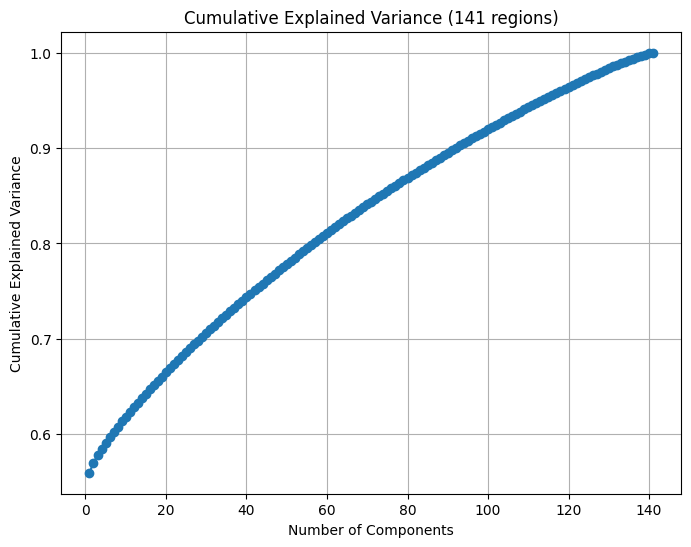

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- For samples with 239 features ---
num_features_141 = 141
pca_141 = PCA(n_components=num_features_141)
samples_clean = np.nan_to_num(samples, nan=0.0)
pca_141.fit(samples_clean)

explained_variance_141 = pca_141.explained_variance_ratio_
cumulative_variance_141 = np.cumsum(explained_variance_141)

# print("Explained Variance Ratio per PCA Component for 239 features:")
# for i, (ev, cv) in enumerate(zip(explained_variance_239, cumulative_variance_239)):
#     print(f"Component {i+1:3d}: {ev:.4f} (Cumulative: {cv:.4f})")

# --- Plotting both cumulative explained variance plots as subplots ---
plt.figure(figsize=(8, 6))

# Plot for the 239-dimensional samples
plt.plot(range(1, num_features_141 + 1), cumulative_variance_141, marker='o', linestyle='-')
plt.title("Cumulative Explained Variance (141 regions)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


C:\Users\fjpgr\AppData\Local\Temp\ipykernel_16824\2736684229.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap('gist_ncar', numCellTypes)


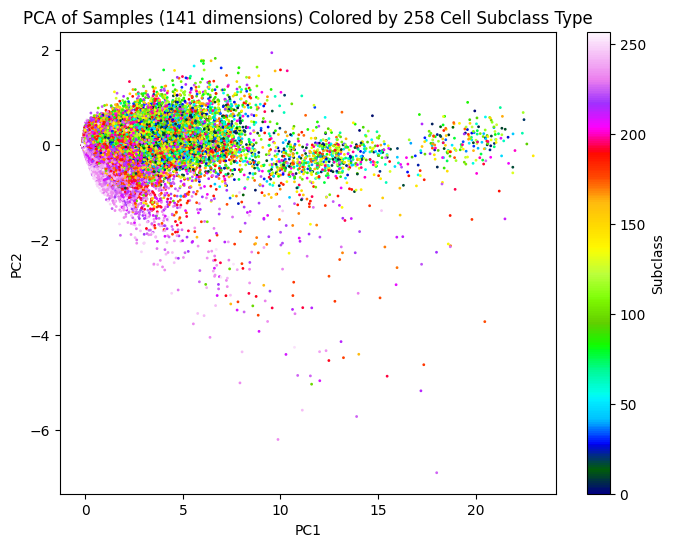

In [ ]:
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
samples239pca = pca.fit_transform(samples_clean)

# Align subclasses to the corresponding classes
numCellTypes = 258
numGeneTypes = 15926 
sampleSubclassLabels = np.tile(np.arange(numCellTypes), numGeneTypes)

# Get a continuous colormap and discretize it to 104 colors
base_cmap = plt.cm.get_cmap('gist_ncar', numCellTypes)
colors = base_cmap(np.linspace(0, 1, numCellTypes))
custom_cmap = ListedColormap(colors)

plt.figure(figsize=(8, 6))
scatter1 = plt.scatter(samples239pca[:, 0], samples239pca[:, 1],
                          c=sampleSubclassLabels, cmap=custom_cmap, s=1)
plt.title('PCA of Samples (141 dimensions) Colored by 258 Cell Subclass Type')
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar(scatter1)
cbar.set_label('Subclass')

# Mouse data:

C:\Users\fjpgr\AppData\Local\Temp\ipykernel_21172\1365151637.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap('gist_ncar', numCellTypes)
C:\Users\fjpgr\AppData\Local\Temp\ipykernel_21172\1365151637.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(uniqueClasses)


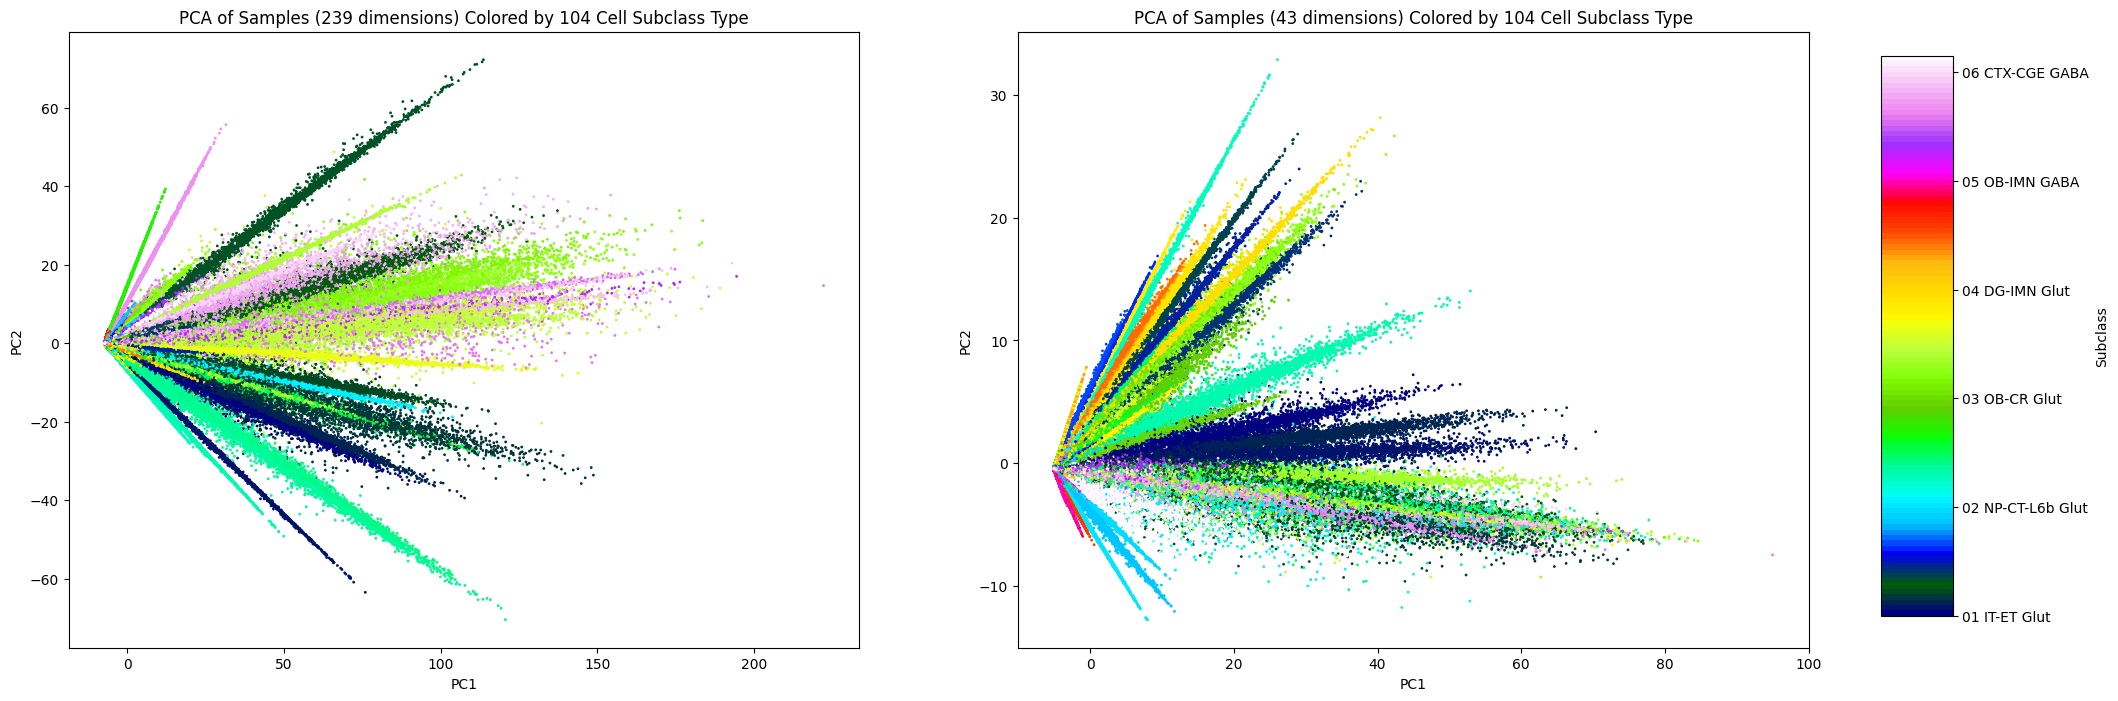

In [18]:
# Get a continuous colormap and discretize it to 104 colors
base_cmap = plt.cm.get_cmap('gist_ncar', numCellTypes)
colors = base_cmap(np.linspace(0, 1, numCellTypes))
custom_cmap = ListedColormap(colors)

# Create subplots and leave extra space on the right for a shared colorbar.
fig, axs = plt.subplots(1, 2, figsize=(24, 8))
plt.subplots_adjust(right=0.85)  # leave space on the right

# Left subplot: PCA for samples239pca
scatter1 = axs[0].scatter(samples239pca[:, 0], samples239pca[:, 1],
                          c=sampleSubclassLabels, cmap=custom_cmap, s=1)
axs[0].set_title('PCA of Samples (239 dimensions) Colored by 104 Cell Subclass Type')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

# Right subplot: PCA for samples43pca
scatter2 = axs[1].scatter(samples43pca[:, 0], samples43pca[:, 1],
                          c=sampleSubclassLabels, cmap=custom_cmap, s=1)
axs[1].set_title('PCA of Samples (43 dimensions) Colored by 104 Cell Subclass Type')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

# Create a separate axes for the shared colorbar on the right side.
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
cbar = fig.colorbar(scatter1, cax=cbar_ax)
cbar.set_label('Subclass')
cbar.ax.set_yticklabels(uniqueClasses)

plt.show()

# Adding class to the subclasses

In [ ]:
# Open the dataset
ds = xr.open_dataset('aggregated_data.nc')

# Assuming 'subclass' is a 1D variable (an array of strings)
cellType_values = ds['subclass'].values

# Create a DataFrame with two columns: one for the code and one for the description
df = pd.DataFrame(cellType_values, columns=['subclass'])

# Save the DataFrame to a CSV file
df.to_csv('mouseCellTypes.csv', index=True, index_label='index')

CSV file saved as 'subclass_split.csv'


In [54]:
df_second = pd.read_csv(r"D:\Mouse\GeneExpressions\metadata\WMB-taxonomy\20231215\views\cluster_to_cluster_annotation_membership_pivoted.csv")    # This CSV has a column 'subclass'
df_first = pd.read_csv('mouseCellTypes.csv')

df_merged = pd.merge(df_first, df_second[['subclass', 'class']], on='subclass', how='left')
df_merged = df_merged.drop_duplicates()
df_merged.to_csv('mouseCellTypesWithClass.csv', index=False)

# Getting the samples for 239 regions

In [ ]:
ds = xr.open_dataset("aggregated_data.nc")
mean_expr = ds["mean"].values
mean_data_permuted = np.transpose(mean_expr, (0, 2, 1))
samples = mean_data_permuted.reshape(-1, mean_expr.shape[1])
print("Samples shape:", samples.shape)  # Expected: (8460*104, 239)

np.save("samplesRegions.npy", samples)

Samples shape: (879840, 239)


# Merging the data to the 43 regions

In [ ]:
# ----- Step 1: Load the taxonomy CSV -----
# Assume the CSV has columns: 'parcellation_index', 'organ', 'category', 'division', 'structure', 'substructure'
taxonomy = pd.read_csv(r"D:\Mouse\GeneExpressions\metadata\Allen-CCF-2020\20230630\views\parcellation_to_parcellation_term_membership_acronym.csv")

# Set the index to 'parcellation_index' for easy lookup.
taxonomy.set_index("parcellation_index", inplace=True)

# ----- Step 2: Load the xarray dataset -----
ds = xr.open_dataset("aggregated_data.nc")
# The dataset has coordinates: gene_symbol, parcellation_index, subclass

# ----- Step 3: Map parcellation_index to structure -----
# For each parcellation_index in ds, look up its corresponding structure from the taxonomy
# We assume that ds.parcellation_index values match the values in the CSV.
structure_coords = [taxonomy.loc[idx, "structure"] for idx in ds.coords["parcellation_index"].values]

# Assign a new coordinate 'structure' to the dataset along the parcellation_index dimension.
ds = ds.assign_coords(structure=("parcellation_index", structure_coords))

grouped_sum = ds["sum"].groupby("structure").sum(dim="parcellation_index")
grouped_count = ds["count"].groupby("structure").sum(dim="parcellation_index")
weighted_mean = grouped_sum / grouped_count

# Optionally, you can also group other variables (e.g., the pre-computed mean) if needed.
# Here, we create a grouped dataset that takes the simple mean, and then add the weighted mean as a new variable.
ds_grouped = ds.groupby("structure").mean(dim="parcellation_index")
ds_grouped["weighted_mean"] = weighted_mean

# Print the resulting grouped dataset (or inspect a variable)
print(ds_grouped)

mean_data = ds_grouped["weighted_mean"].values  # shape: (8640, 43, 104)
mean_data_permuted = np.transpose(mean_data, (0, 2, 1))
# Then reshape to (8460*104, 239)
samples43 = mean_data_permuted.reshape(-1, mean_data.shape[1])
print("Samples shape:", samples43.shape)  # Expected: (8460*104, 239)

np.save("samples43Regions.npy", samples43)

<xarray.Dataset> Size: 1GB
Dimensions:        (structure: 43, gene_symbol: 8460, subclass: 104)
Coordinates:
  * gene_symbol    (gene_symbol) <U18 609kB 'ENSMUSG00000026676' ... 'ENSMUSG...
  * subclass       (subclass) <U29 12kB '001 CLA-EPd-CTX Car3 Glut' ... '338 ...
  * structure      (structure) object 344B 'ACAd' 'ACAv' ... 'VISpor' 'VISrl'
Data variables:
    sum            (structure, gene_symbol, subclass) float64 303MB 0.0 ... 0...
    count          (structure, gene_symbol, subclass) float64 303MB 0.0 ... 0...
    mean           (structure, gene_symbol, subclass) float64 303MB nan ... 0...
    weighted_mean  (gene_symbol, structure, subclass) float64 303MB nan ... 0...
Samples shape: (879840, 43)


# How I got the subclass_sizes

In [ ]:
# Load cell metadata
metadata = pd.read_csv(
    r"D:\Mouse\GeneExpressions\metadata\MERFISH-C57BL6J-638850-CCF\20231215\views\cell_metadata_with_parcellation_annotation.csv",
    usecols=['cell_label','subclass','parcellation_division']
)

# Filter for Isocortex and the unique subclasses
metadataIsocortex = metadata[metadata['parcellation_division'] == 'Isocortex']
subclasses = metadataIsocortex['subclass'].unique()

# Set the index to 'cell_label' so it matches exprData.obs_names
metadataIsocortex.set_index('cell_label')

# Load the expression data
geneImputedExpression = r"D:\Mouse\GeneExpressions\expression_matrices\MERFISH-C57BL6J-638850-imputed\20240831\C57BL6J-638850-imputed-log2.h5ad"
exprData = anndata.read_h5ad(geneImputedExpression, backed='r')

subclass_size = {}

for subclass in subclasses:
    # Get cell labels for current parcellation index
    subclass_cells = metadataIsocortex[metadataIsocortex['subclass'] == subclass]['cell_label'].tolist()
    
    # Find the intersection between these cell labels and the AnnData obs_names
    cellsExpr = exprData.obs_names.intersection(subclass_cells)

    subclass_size[subclass] = len(cellsExpr)

with open('D:\\Mouse\\Mouse_Subclass_Cells_Found.json', 'w') as f:
    json.dump(subclass_size, f)

# Proof showing that the labelling in PCA is sound

In [10]:
import numpy as np

# Create dummy data that mimics your original mean_data shape (8460, 239, 104)
# For demonstration purposes, we'll use smaller numbers:
num_subjects = 5      # instead of 8460
num_features = 5    # stays the same
num_parcels = 4       # instead of 104

# Create dummy mean_data with shape (num_subjects, num_features, num_parcels)
mean_data = np.random.rand(num_subjects, num_features, num_parcels)

# Permute dimensions to get shape (num_subjects, num_parcels, num_features)
mean_data_permuted = np.transpose(mean_data, (0, 2, 1))
print("Shape of mean_data_permuted:", mean_data_permuted.shape)  # (5, 4, 239)

# Reshape to combine the first two dimensions into one:
samples = mean_data_permuted.reshape(-1, num_features)
print("Shape of samples:", samples.shape)  # (5*4, 239) -> (20, 239)

# Let's choose a specific subject and parcel.
# For example, subject index 3 and parcel index 2:
subject_index = 3
parcel_index = 2

# In the reshaped samples, the corresponding row index is:
row_index = subject_index * num_parcels + parcel_index

print("\nRow in 'samples' at index {}:".format(row_index))
print(samples[row_index])

print("\nCorresponding row in 'mean_data_permuted' for subject {} and parcel {}:".format(subject_index, parcel_index))
print(mean_data_permuted[subject_index, parcel_index, :])

# They should be exactly the same.
print("\nAre they equal?", np.allclose(samples[row_index], mean_data_permuted[subject_index, parcel_index, :]))


Shape of mean_data_permuted: (5, 4, 5)
Shape of samples: (20, 5)

Row in 'samples' at index 14:
[0.31050204 0.58590083 0.62109435 0.97584156 0.80135356]

Corresponding row in 'mean_data_permuted' for subject 3 and parcel 2:
[0.31050204 0.58590083 0.62109435 0.97584156 0.80135356]

Are they equal? True
